# 演習問題3 確率関数と分布関数、期待値と分散

## (1) 確率関数（確率分布）と分布関数

numpyで解く

In [27]:
from collections import defaultdict, Counter
import itertools
import numpy as np
import pandas as pd

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns; sns.set() # sns.set() ==> グラフの見た目をseabornに合わせる

In [28]:
# https://www.haya-programming.com/entry/2018/03/31/174915
n = 100  # 1回の実験あたりに行う試行回数
N = 1000  # 実験回数

result=[]
for i in range(N):
    X = np.random.choice(range(1,7), size=n, p=[0.1, 0.1, 0.2, 0.3, 0.2, 0.1])
    _, C = np.unique(X, return_counts=True)
    result.append(C)

result

4, 11]),
 array([10,  6, 27, 28, 16, 13]),
 array([11, 12, 20, 26, 22,  9]),
 array([ 9,  9, 25, 28, 20,  9]),
 array([13,  9, 20, 32, 16, 10]),
 array([ 9, 11, 22, 36, 12, 10]),
 array([16,  9, 13, 26, 24, 12]),
 array([ 7, 14, 18, 28, 22, 11]),
 array([ 6,  9, 18, 35, 23,  9]),
 array([11,  8, 18, 25, 22, 16]),
 array([13,  8, 25, 33, 12,  9]),
 array([ 9,  8, 18, 44, 17,  4]),
 array([ 8,  8, 22, 31, 18, 13]),
 array([ 8,  9, 18, 35, 21,  9]),
 array([14,  6, 24, 24, 24,  8]),
 array([14,  7, 25, 31, 16,  7]),
 array([ 9, 12, 24, 29, 22,  4]),
 array([ 9,  3, 21, 31, 24, 12]),
 array([ 9,  9, 21, 25, 26, 10]),
 array([ 7, 11, 16, 38, 14, 14]),
 array([10, 12, 18, 30, 19, 11]),
 array([ 8, 11, 25, 21, 22, 13]),
 array([ 9,  7, 11, 37, 27,  9]),
 array([15, 14, 18, 22, 23,  8]),
 array([10,  9, 22, 26, 21, 12]),
 array([11, 11, 21, 32, 14, 11]),
 array([ 8,  8, 22, 28, 25,  9]),
 array([ 7, 15, 19, 27, 24,  8]),
 array([13,  2, 27, 28, 16, 14]),
 array([ 7,  7, 21, 29, 21, 15]),
 arra

In [29]:
df = pd.DataFrame(result)
df.columns = range(1,7)
df

,1,2,3,4,5,6
0,11,11,23,29,18,8
1,13,10,19,30,18,10
2,12,8,22,27,19,12
3,16,16,19,20,23,6
4,10,7,21,27,23,12
...,...,...,...,...,...,...
995,12,8,19,28,19,14
996,10,12,23,22,27,6
997,10,7,26,31,18,8
998,6,13,19,33,19,10


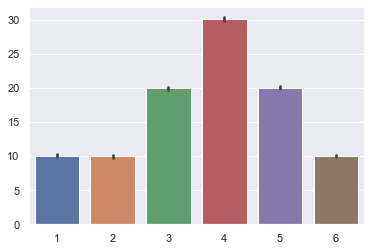

In [30]:
sns.barplot(data=df);

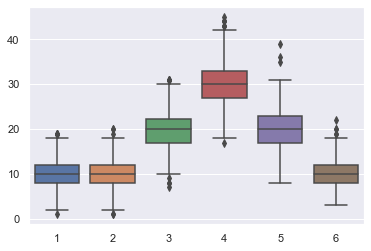

In [31]:
sns.boxplot(data=df);

In [32]:
df_sum = np.cumsum(df, axis=1)
df_sum

,1,2,3,4,5,6
0,11,22,45,74,92,100
1,13,23,42,72,90,100
2,12,20,42,69,88,100
3,16,32,51,71,94,100
4,10,17,38,65,88,100
...,...,...,...,...,...,...
995,12,20,39,67,86,100
996,10,22,45,67,94,100
997,10,17,43,74,92,100
998,6,19,38,71,90,100


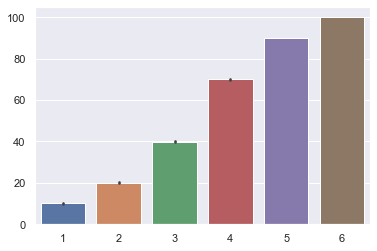

In [33]:
sns.barplot(data=df_sum);

## (2) 期待値と分散

各試行に対して、標本平均と標本分散を算出する。

In [34]:
# https://bellcurve.jp/statistics/course/8614.html

df['xb'] = sum(i*df[i] for i in range(1,7)) / n
df['sig2'] = 1/n * sum(df[i]*(i-df['xb'])**2 for i in range(1,7))
df

,1,2,3,4,5,6,xb,sig2
0,11,11,23,29,18,8,3.56,1.9664
1,13,10,19,30,18,10,3.60,2.1800
2,12,8,22,27,19,12,3.69,2.1939
3,16,16,19,20,23,6,3.36,2.3304
4,10,7,21,27,23,12,3.82,2.0676
...,...,...,...,...,...,...,...,...
995,12,8,19,28,19,14,3.76,2.2824
996,10,12,23,22,27,6,3.62,1.9756
997,10,7,26,31,18,8,3.64,1.8104
998,6,13,19,33,19,10,3.76,1.7824


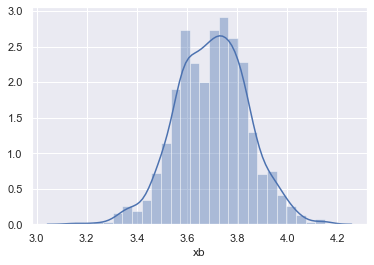

In [35]:
# 標本平均のヒストグラム
sns.distplot(df["xb"])

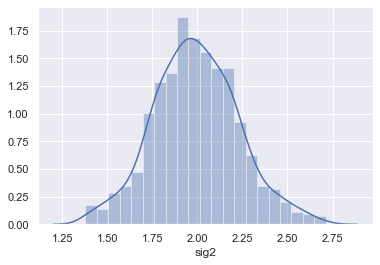

In [36]:
# 標本分散のヒストグラム
sns.distplot(df["sig2"]);